In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("unclean_pet_data.csv")

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetType             561 non-null    object 
 1   Breed               561 non-null    object 
 2   AgeMonths           505 non-null    float64
 3   Size                561 non-null    object 
 4   WeightKg            505 non-null    float64
 5   TimeInShelterDays   505 non-null    float64
 6   AdoptionLikelihood  561 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 30.8+ KB
None

First few rows of the dataset:
  PetType    Breed  AgeMonths    Size   WeightKg  TimeInShelterDays  \
0  Rabbit   Rabbit      116.0  Medium  29.186575               71.0   
1     Cat  Siamese      165.0  Medium  25.265161               52.0   
2     Cat  Siamese        NaN   Small        NaN                NaN   
3  Rabbit   Rabbit       31.0   Large   6.641891         

In [ ]:
# Fill missing numeric values with the median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill missing categorical values with the most frequent value
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values handled successfully.")



Missing values handled successfully.


<ipython-input-4-2e113683e739>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode all categorical columns using Label Encoding
encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

print("\nCategorical columns encoded successfully.")



Categorical columns encoded successfully.


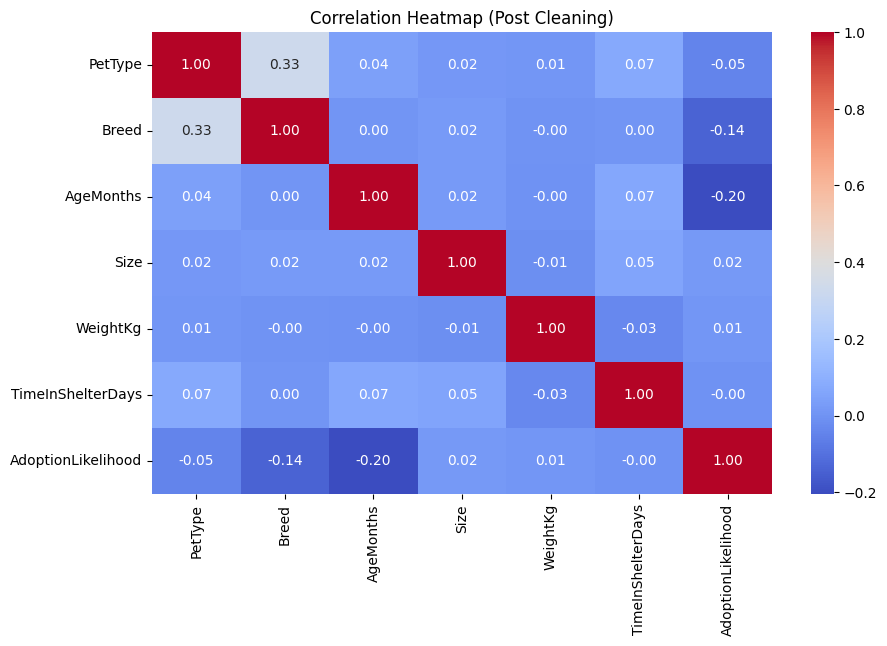

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Post Cleaning)")
plt.show()


In [ ]:
# Define the features and target variable
X = df[['PetType', 'Breed', 'AgeMonths', 'Size', 'WeightKg', 'TimeInShelterDays']]  # Features
y = df['AdoptionLikelihood']  # Target variable

# Converting categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Gini Index Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.70      0.75        77
           1       0.50      0.64      0.56        36

    accuracy                           0.68       113
   macro avg       0.65      0.67      0.66       113
weighted avg       0.71      0.68      0.69       113

Confusion Matrix (Gini Index):
 [[54 23]
 [13 23]]


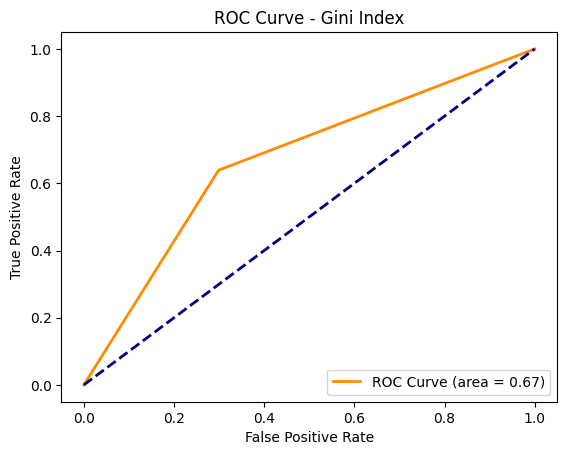

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Decision Tree Classifier with Gini Index
gini_model = DecisionTreeClassifier(criterion='gini', random_state=42)
gini_model.fit(X_train, y_train)

# Predictions
y_pred_gini = gini_model.predict(X_test)

# Metrics
print("Gini Index Classification Report:\n", classification_report(y_test, y_pred_gini))
cm_gini = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix (Gini Index):\n", cm_gini)

# ROC Curve and AUC
probs_gini = gini_model.predict_proba(X_test)[:, 1]
fpr_gini, tpr_gini, _ = roc_curve(y_test, probs_gini)
roc_auc_gini = auc(fpr_gini, tpr_gini)

plt.figure()
plt.plot(fpr_gini, tpr_gini, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc_gini:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gini Index')
plt.legend(loc="lower right")
plt.show()


Entropy Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77        77
           1       0.50      0.47      0.49        36

    accuracy                           0.68       113
   macro avg       0.63      0.63      0.63       113
weighted avg       0.68      0.68      0.68       113

Confusion Matrix (Entropy):
 [[60 17]
 [19 17]]


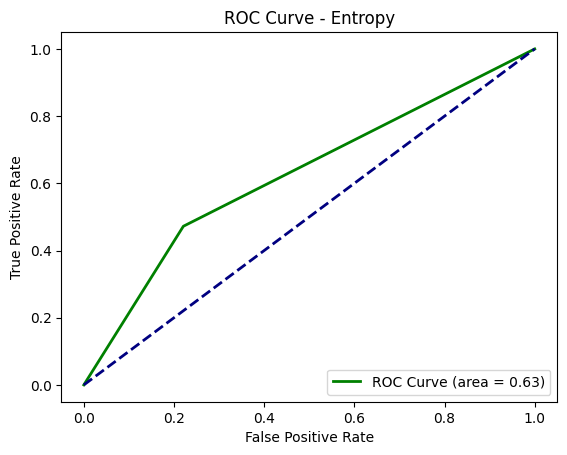

In [ ]:
# Decision Tree Classifier with Entropy
entropy_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
entropy_model.fit(X_train, y_train)

# Predictions
y_pred_entropy = entropy_model.predict(X_test)

# Metrics
print("Entropy Classification Report:\n", classification_report(y_test, y_pred_entropy))
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
print("Confusion Matrix (Entropy):\n", cm_entropy)

# ROC Curve and AUC
probs_entropy = entropy_model.predict_proba(X_test)[:, 1]
fpr_entropy, tpr_entropy, _ = roc_curve(y_test, probs_entropy)
roc_auc_entropy = auc(fpr_entropy, tpr_entropy)

plt.figure()
plt.plot(fpr_entropy, tpr_entropy, color='green', lw=2, label=f'ROC Curve (area = {roc_auc_entropy:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Entropy')
plt.legend(loc="lower right")
plt.show()


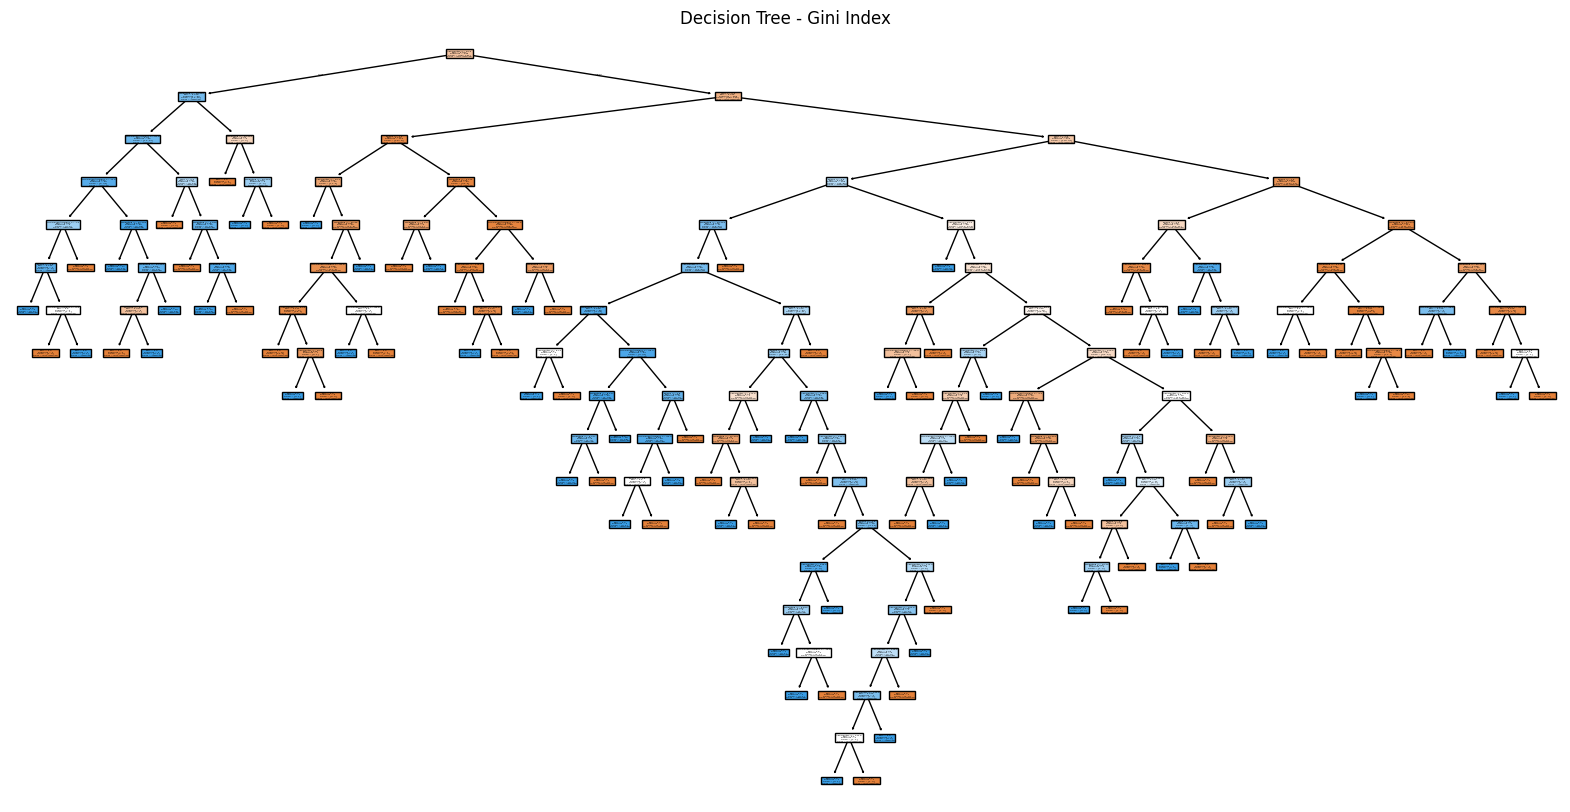

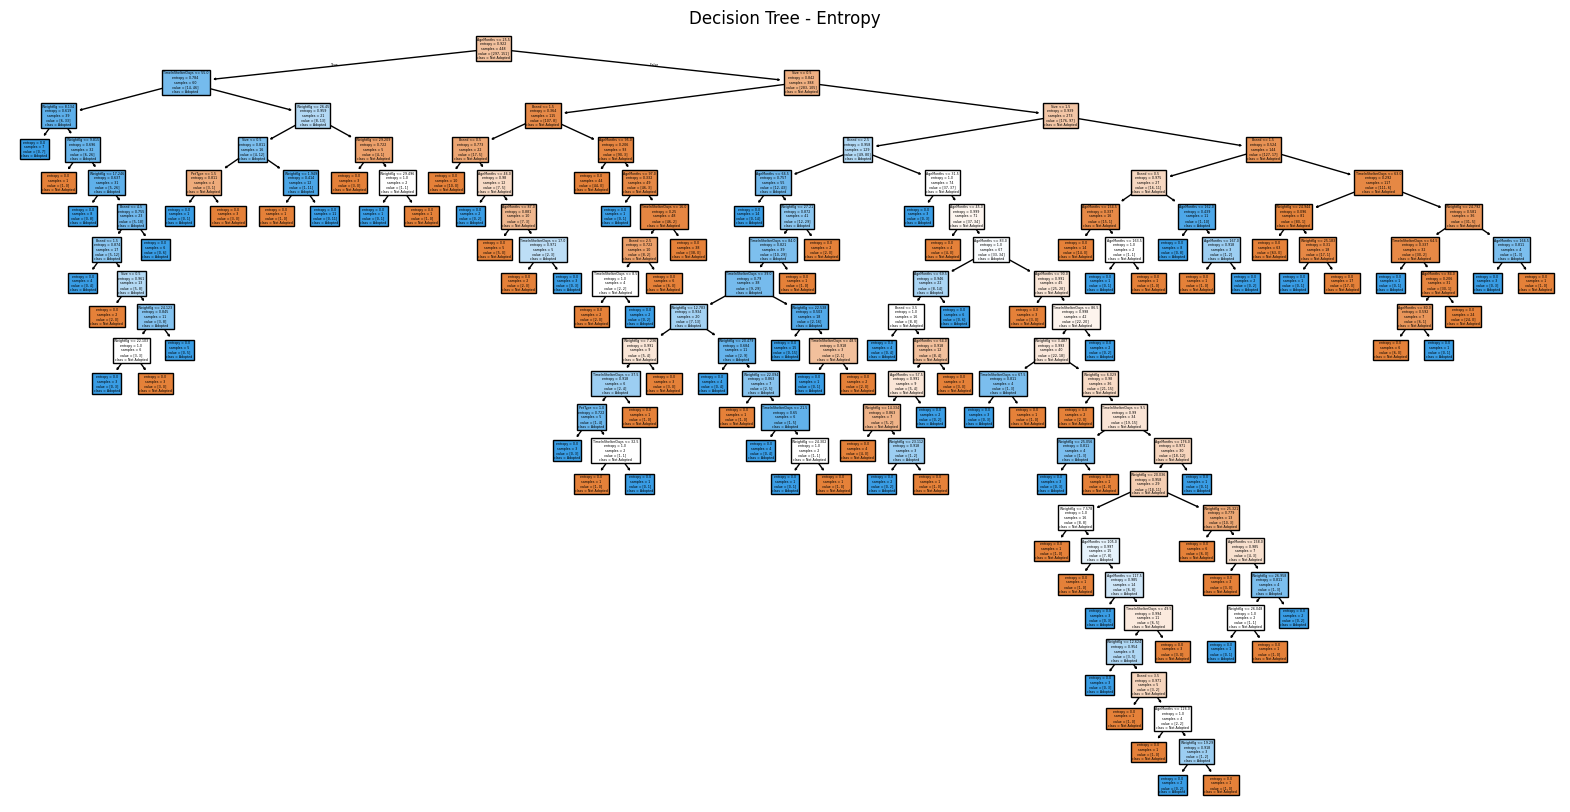

In [ ]:
from sklearn.tree import plot_tree

# Visualization of the Decision Tree - Gini Index
plt.figure(figsize=(20, 10))
plot_tree(gini_model, feature_names=X.columns, class_names=['Not Adopted', 'Adopted'], filled=True)
plt.title("Decision Tree - Gini Index")
plt.show()

# Visualization of the Decision Tree - Entropy
plt.figure(figsize=(20, 10))
plot_tree(entropy_model, feature_names=X.columns, class_names=['Not Adopted', 'Adopted'], filled=True)
plt.title("Decision Tree - Entropy")
plt.show()


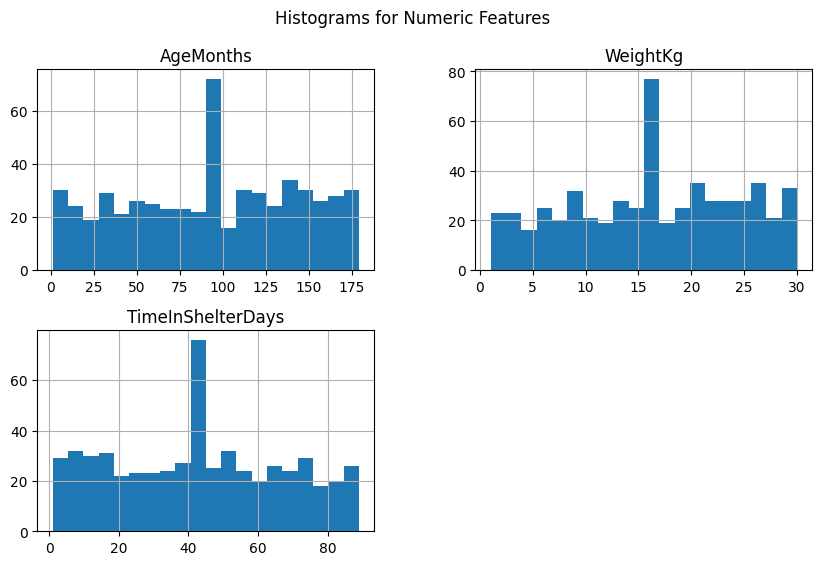

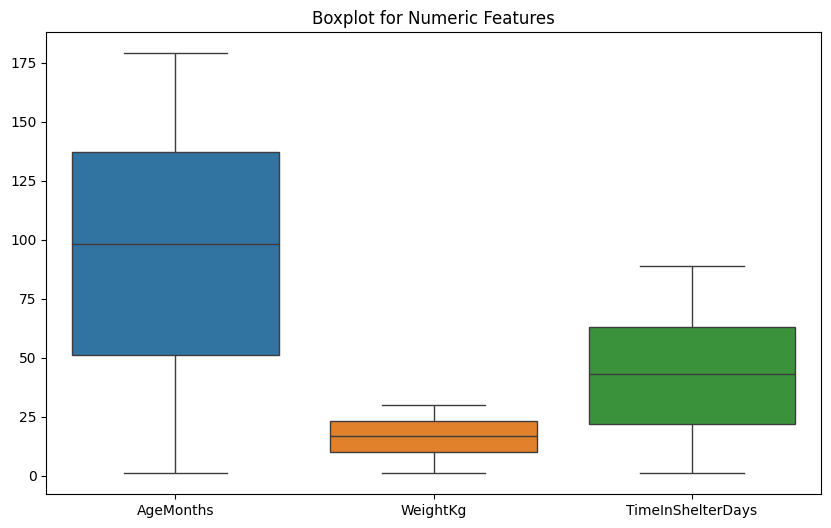

In [ ]:
# Univariate Analysis for Numeric Features
df[['AgeMonths', 'WeightKg', 'TimeInShelterDays']].hist(bins=20, figsize=(10, 6))
plt.suptitle("Histograms for Numeric Features")
plt.show()

# Boxplots for each numeric feature
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['AgeMonths', 'WeightKg', 'TimeInShelterDays']])
plt.title("Boxplot for Numeric Features")
plt.show()


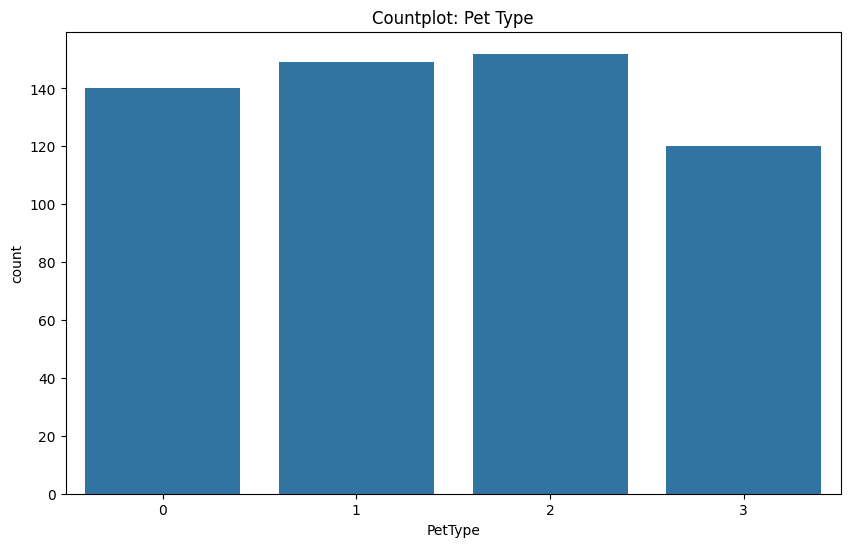


Frequency Distribution for Categorical Variables:
PetType
2    152
1    149
0    140
3    120
Name: count, dtype: int64


In [ ]:
# Univariate Analysis for Categorical Features
plt.figure(figsize=(10, 6))
sns.countplot(x='PetType', data=df)
plt.title("Countplot: Pet Type")
plt.show()

# Frequency distribution for categorical variables
print("\nFrequency Distribution for Categorical Variables:")
print(df['PetType'].value_counts())


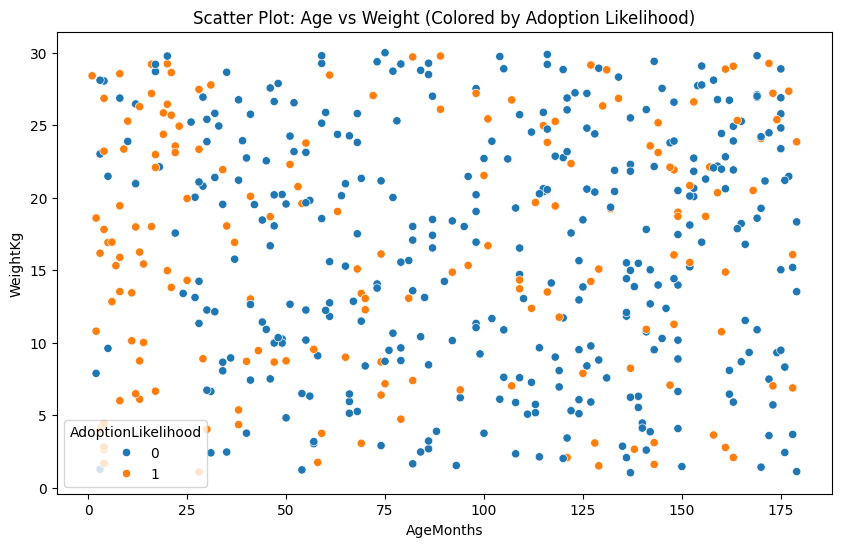

In [ ]:
# Bivariate Analysis: Numeric vs Numeric (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AgeMonths', y='WeightKg', hue='AdoptionLikelihood', data=df)
plt.title("Scatter Plot: Age vs Weight (Colored by Adoption Likelihood)")
plt.show()


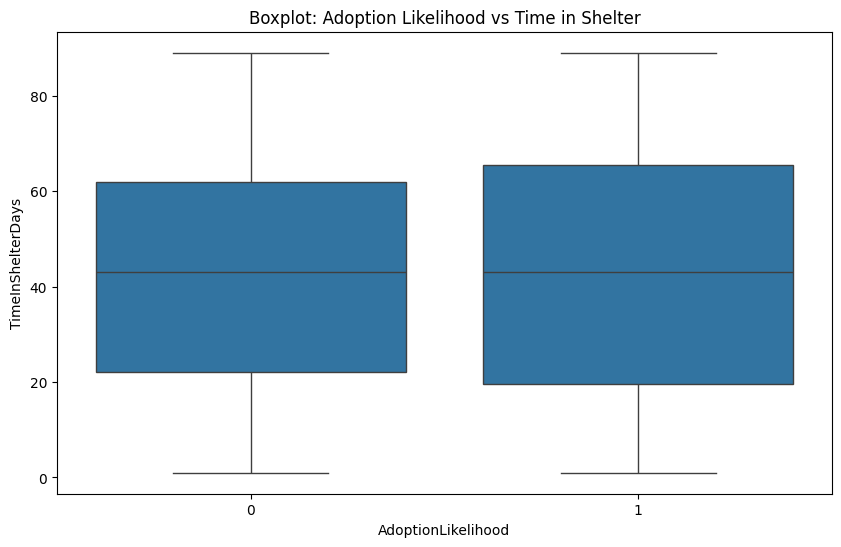

In [ ]:
# Bivariate Analysis: Numeric vs Categorical
plt.figure(figsize=(10, 6))
sns.boxplot(x='AdoptionLikelihood', y='TimeInShelterDays', data=df)
plt.title("Boxplot: Adoption Likelihood vs Time in Shelter")
plt.show()


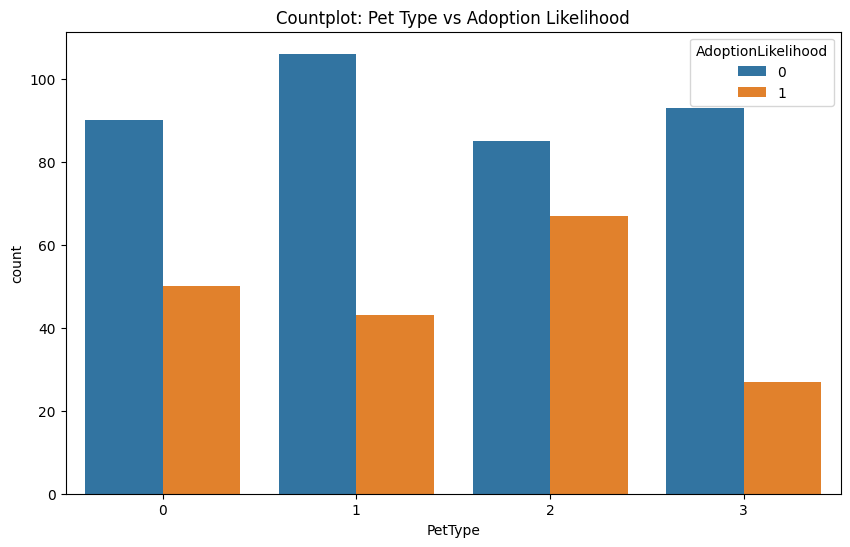

In [ ]:
# Bivariate Analysis: Categorical vs Categorical
plt.figure(figsize=(10, 6))
sns.countplot(x='PetType', hue='AdoptionLikelihood', data=df)
plt.title("Countplot: Pet Type vs Adoption Likelihood")
plt.show()


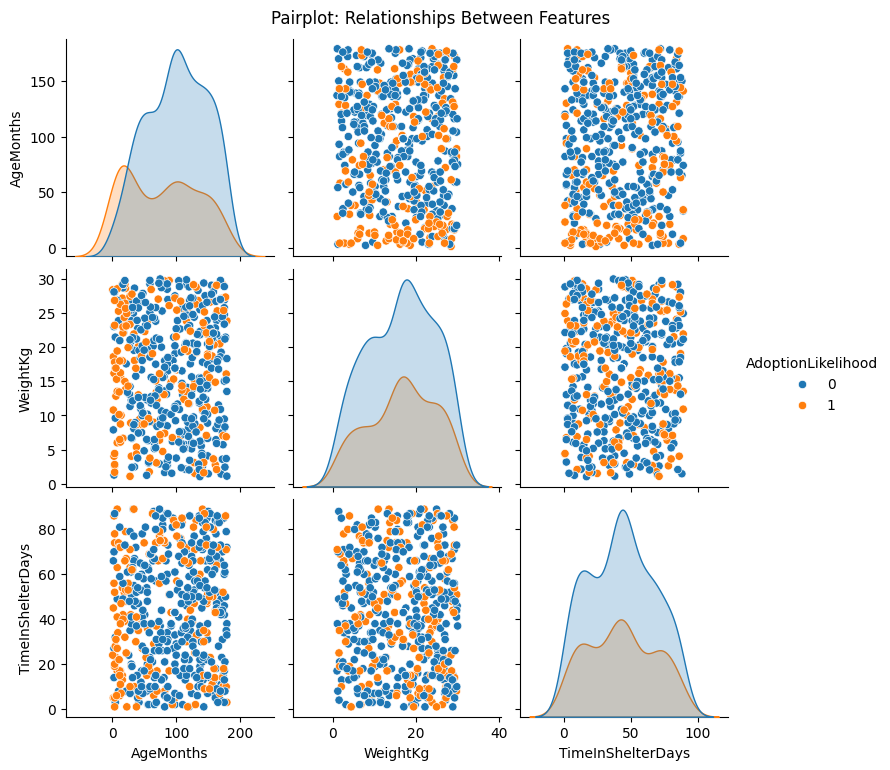

In [ ]:
# Multivariate Analysis: Pairplot
sns.pairplot(df[['AgeMonths', 'WeightKg', 'TimeInShelterDays', 'AdoptionLikelihood']], hue='AdoptionLikelihood')
plt.suptitle("Pairplot: Relationships Between Features", y=1.02)
plt.show()


In [ ]:
# Final Scores and Predictions

# Accuracy of both models
gini_accuracy = gini_model.score(X_test, y_test)
entropy_accuracy = entropy_model.score(X_test, y_test)

# Print the accuracy for both models
print(f"Accuracy (Gini Index): {gini_accuracy:.2f}")
print(f"Accuracy (Entropy): {entropy_accuracy:.2f}")

# Classification Report for both models
print("\nGini Model Classification Report:")
print(classification_report(y_test, y_pred_gini))

print("\nEntropy Model Classification Report:")
print(classification_report(y_test, y_pred_entropy))

# Confusion Matrix for both models
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_entropy = confusion_matrix(y_test, y_pred_entropy)

print("\nConfusion Matrix (Gini Index):")
print(cm_gini)

print("\nConfusion Matrix (Entropy):")
print(cm_entropy)

# Precision, Recall, F-Score Analysis for both models
# Gini Model
precision_gini = precision_score(y_test, y_pred_gini)
recall_gini = recall_score(y_test, y_pred_gini)
fscore_gini = f1_score(y_test, y_pred_gini)

# Entropy Model
precision_entropy = precision_score(y_test, y_pred_entropy)
recall_entropy = recall_score(y_test, y_pred_entropy)
fscore_entropy = f1_score(y_test, y_pred_entropy)

# Print Precision, Recall, F-Score
print("\nGini Model - Precision, Recall, F-score:")
print(f"Precision: {precision_gini:.2f}, Recall: {recall_gini:.2f}, F-Score: {fscore_gini:.2f}")

print("\nEntropy Model - Precision, Recall, F-score:")
print(f"Precision: {precision_entropy:.2f}, Recall: {recall_entropy:.2f}, F-Score: {fscore_entropy:.2f}")


# Comparative Analysis: Accuracy, Precision, Recall, F-Score
print("\nComparative Analysis:")

# Accuracy Comparison
print(f"Accuracy (Gini Index): {gini_accuracy:.2f}")
print(f"Accuracy (Entropy): {entropy_accuracy:.2f}")

# Precision, Recall, F-Score Comparison
print(f"Precision (Gini Index): {precision_gini:.2f} vs Precision (Entropy): {precision_entropy:.2f}")
print(f"Recall (Gini Index): {recall_gini:.2f} vs Recall (Entropy): {recall_entropy:.2f}")
print(f"F-Score (Gini Index): {fscore_gini:.2f} vs F-Score (Entropy): {fscore_entropy:.2f}")


Accuracy (Gini Index): 0.68
Accuracy (Entropy): 0.68

Gini Model Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75        77
           1       0.50      0.64      0.56        36

    accuracy                           0.68       113
   macro avg       0.65      0.67      0.66       113
weighted avg       0.71      0.68      0.69       113


Entropy Model Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        77
           1       0.50      0.47      0.49        36

    accuracy                           0.68       113
   macro avg       0.63      0.63      0.63       113
weighted avg       0.68      0.68      0.68       113


Confusion Matrix (Gini Index):
[[54 23]
 [13 23]]

Confusion Matrix (Entropy):
[[60 17]
 [19 17]]


NameError: name 'precision_score' is not defined

Accuracy (Pre-pruned): 0.72


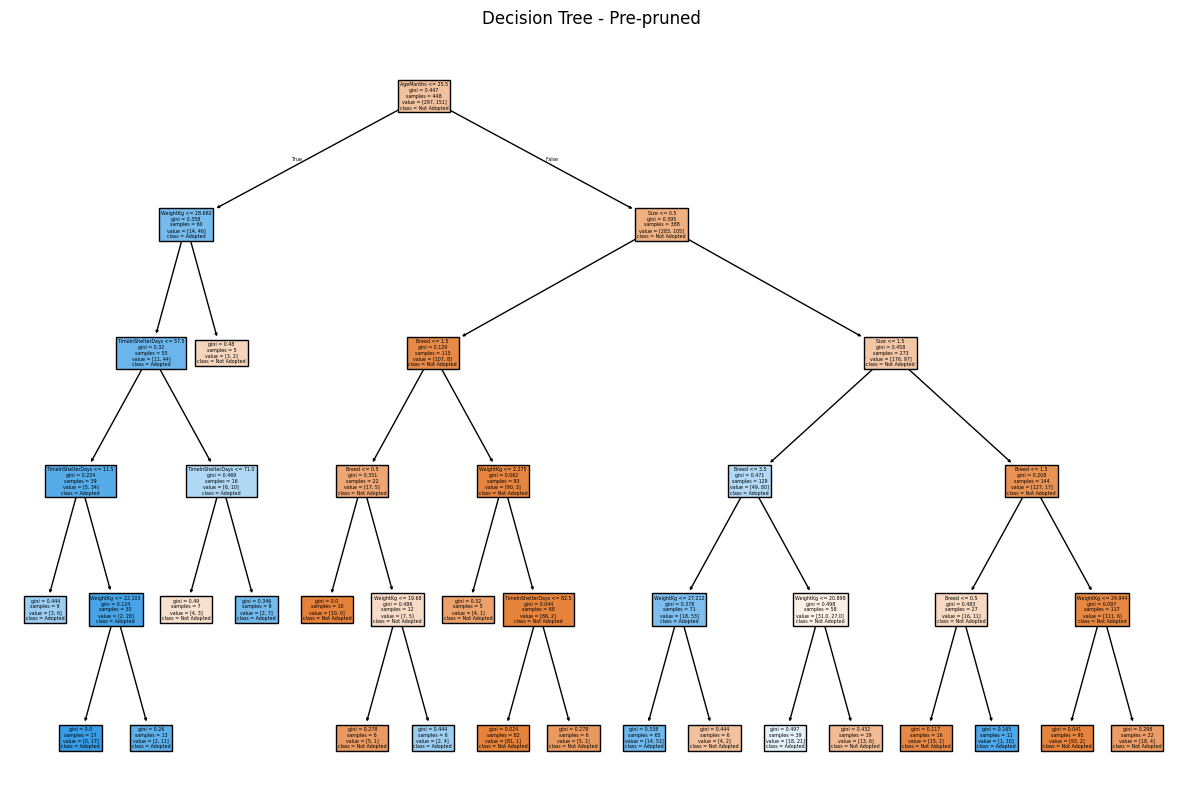

Accuracy (Post-pruned): 0.74


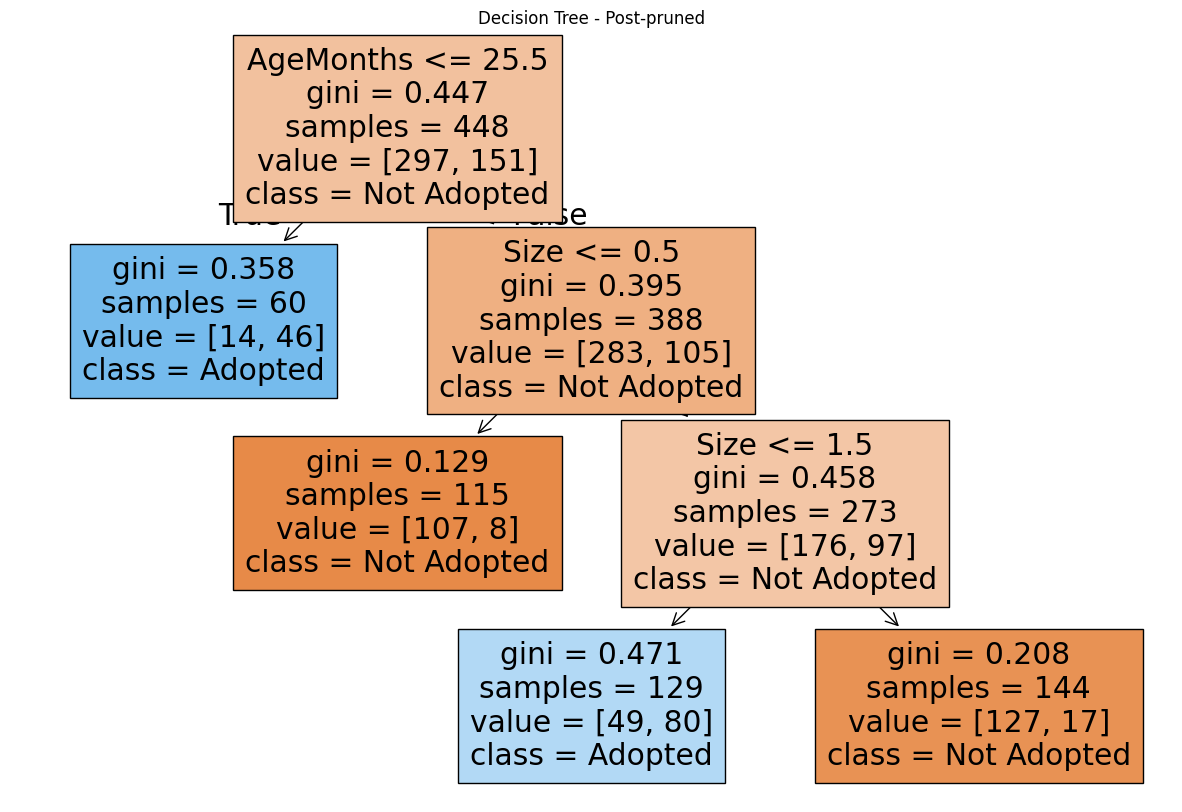

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

prepruned_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
prepruned_model.fit(X_train, y_train)
y_pred_prepruned = prepruned_model.predict(X_test)
accuracy_prepruned = accuracy_score(y_test, y_pred_prepruned)
print(f"Accuracy (Pre-pruned): {accuracy_prepruned:.2f}")

plt.figure(figsize=(15, 10))
plot_tree(prepruned_model, feature_names=X.columns, class_names=['Not Adopted', 'Adopted'], filled=True)
plt.title("Decision Tree - Pre-pruned")
plt.show()

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'ccp_alpha': np.arange(0.0, 0.1, 0.005)
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_ccp_alpha = grid_search.best_params_['ccp_alpha']

postpruned_model = DecisionTreeClassifier(ccp_alpha=best_ccp_alpha, random_state=42)
postpruned_model.fit(X_train, y_train)

y_pred_postpruned = postpruned_model.predict(X_test)
accuracy_postpruned = accuracy_score(y_test, y_pred_postpruned)
print(f"Accuracy (Post-pruned): {accuracy_postpruned:.2f}")

plt.figure(figsize=(15, 10))
plot_tree(postpruned_model, feature_names=X.columns, class_names=['Not Adopted', 'Adopted'], filled=True)
plt.title("Decision Tree - Post-pruned")
plt.show()